In [2]:
from mistralai import Mistral
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.environ["MISTRAL_API_KEY"]

client = Mistral(api_key=api_key)

uploaded_pdf = client.files.upload(
    file={
        "file_name": "ltimindtree_annual_report.pdf",
        "content": open("ltimindtree_annual_report.pdf", "rb"),
    },
    purpose="ocr"
)  

In [3]:
retrieved_file = client.files.retrieve(file_id=uploaded_pdf.id)

In [4]:
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [8]:
import os
from mistralai import Mistral

api_key = os.environ["MISTRAL_API_KEY"]
client = Mistral(api_key=api_key)

ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    },
    include_image_base64=True
)

pages=[OCRPageObject(index=0, markdown="# FY24 highlights \n\n## STRONG FINANCIAL\n\nPERFORMANCE\n\n## INR 355,170 Million\n\nREVENUE\n7.07\n\n## INR 45,846 Million\n\nPROFIT AFTER TAX\n4.07\n\n## $25.0 \\%$\n\nRECURN ON EQUITY (ROE)\n\n## EMPOWERNING COMMUNITIES, ENGAGING CUSTOMERS\n\n5.85\n\nCUSTOMER SATISFACTION RATING\n\n## 6.5 days\n\nAVERAGE LEARNING PER EMPLOYEE\n\n## INR 807 Million\n\nCSR SPEND\n\n## 28\n\n## CASE STUDIES\n\n## 198,654 GJ\n\nENERGY CONSUMPTION\n\n## 333,724 ML\n\nWATER CONSUMPTION\n\n## $92.14 \\%$\n\nWASTE RECYCLED\n\n## 98\\% <br> AVERAGE ATTENDANCE RATE AT BOARD MEETINGS\n\n## 25.0\\%\n\nRECURN ON EQUITY (ROE)\n\nY-O-Y GROWTH\n\n## Contents\n\nCORPORATE OVERVIEW\n02 INTRODUCTION\n02 Our Vision for a Limitless Future. Faster. Together.\n04 LITAMindtree journey\n06 Chairman's Message\n08 Chief Executive Officer \\& Managing Director's Message\n12 Message from the Senior Leadership Team\n16 Report profile\n18 Value created for stakeholders\n20 LITIMINDTREE AT 
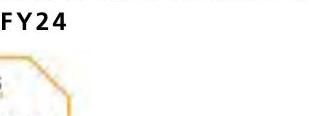
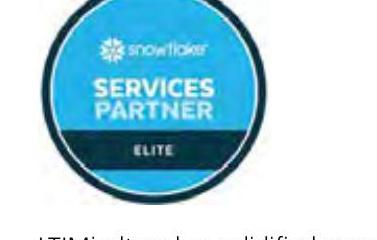
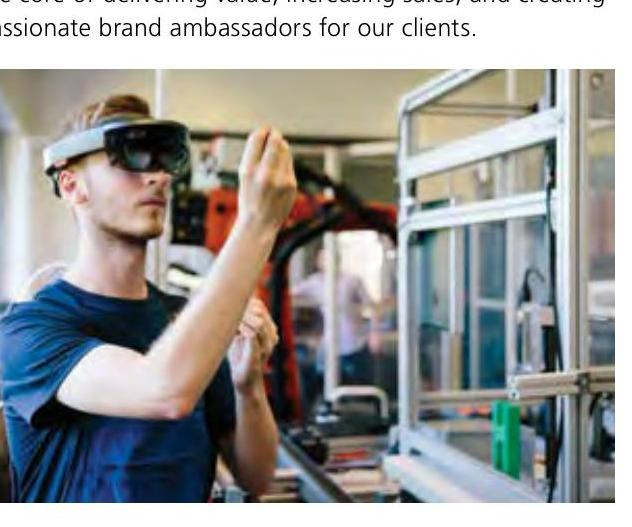
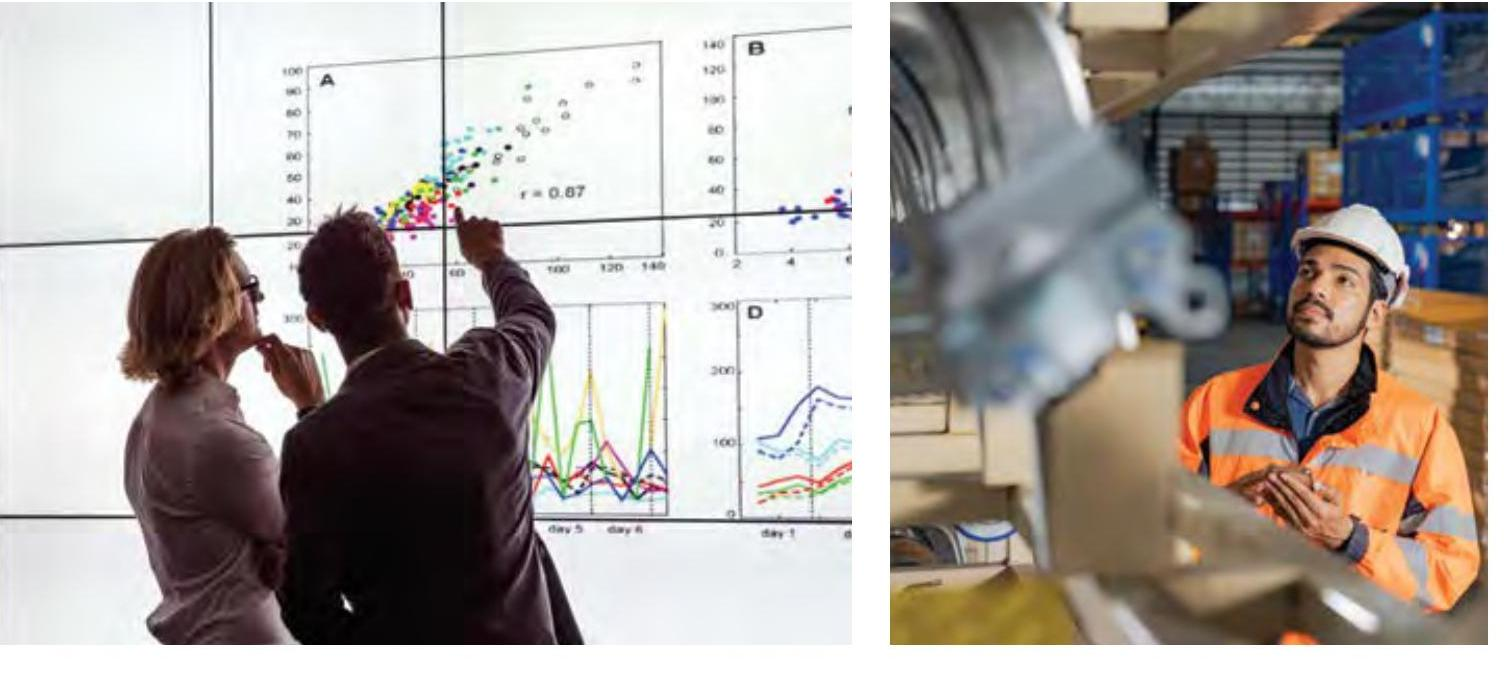

In [9]:
print(ocr_response)

In [10]:
images = [item for item in ocr_response if item.get("type") == "image"]
for img in images:
    print(img.get("base64") or img.get("url"))

AttributeError: 'tuple' object has no attribute 'get'

In [20]:
print(ocr_response.pages[0].markdown)

# FY24 highlights 

## STRONG FINANCIAL

PERFORMANCE

## INR 355,170 Million

REVENUE
7.07

## INR 45,846 Million

PROFIT AFTER TAX
4.07

## $25.0 \%$

RECURN ON EQUITY (ROE)

## EMPOWERNING COMMUNITIES, ENGAGING CUSTOMERS

5.85

CUSTOMER SATISFACTION RATING

## 6.5 days

AVERAGE LEARNING PER EMPLOYEE

## INR 807 Million

CSR SPEND

## 28

## CASE STUDIES

## 198,654 GJ

ENERGY CONSUMPTION

## 333,724 ML

WATER CONSUMPTION

## $92.14 \%$

WASTE RECYCLED

## 98\% <br> AVERAGE ATTENDANCE RATE AT BOARD MEETINGS

## 25.0\%

RECURN ON EQUITY (ROE)

Y-O-Y GROWTH

## Contents

CORPORATE OVERVIEW
02 INTRODUCTION
02 Our Vision for a Limitless Future. Faster. Together.
04 LITAMindtree journey
06 Chairman's Message
08 Chief Executive Officer \& Managing Director's Message
12 Message from the Senior Leadership Team
16 Report profile
18 Value created for stakeholders
20 LITIMINDTREE AT A GLANCE
20 Who we are
22 Service offerings
22 Industries served
38 Global footprint
40 YEAR IN REVIEW
40 Operatio